# Create Topic Model for Incidents

In [1]:
suppressMessages(library(here))
suppressMessages(library(tidyverse))
library(tidytext)
library(SnowballC)
library(topicmodels)
library(ldatuning)
library(here)

assets <- purrr::partial(here, "data-raw", "util", "assets")
data_folder <- purrr::partial(here, "data-raw", ".temp", "data")

Used data as of Oct 12, 2020.

Original exploration can be found at: https://julianbarg.github.io/spills/inquiries/incident_variance/2020-08-03.slides.html#/

In [2]:
# incidents <- readRDS(data_folder("incidents_merged.rds"))
# readr::write_rds(
#   select(incidents, incident_ID, ID, name, on_offshore, commodity, year,
#          narrative),
#   assets("narratives.rds"))
narratives <- readRDS(assets("narratives.rds"))
head(narratives)

incident_ID,ID,name,on_offshore,commodity,year,narrative
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
19860003,22907,Wyco Pipe Line,onshore,rpp,1986,NA
19860005,18194,Seminole Pipeline,onshore,lng,1986,NA
19860027,12628,Mobil Pipeline,onshore,crude,1986,"Crude oil was discovered leaking from the bottom of tank no. 2852 at 0600 on january 30, 1986. The tank was immediately taken out of service and pumped down, which stopped the leak. The escaped crude oil, which was contained in the fire wall, was picked up and returned to the pipeline system. The bottom of this tank was epoxy coated at the time it was constructed in 1963. Tankno. 2652 will be cleaned, gas freed and taken out of service."
19860028,12628,Mobil Pipeline,onshore,rpp,1986,"A contractor was grading a logging road for the kirby lumber company with a dozer when he struck and ruptured the 8"" products pipeline. Therupture was 8 inches long and 4 inches wide. Mobil pipe line had not been notified that the dozer would be working near our pipeline. The pipeline was marked at gist road, 200 yards from the accident site. The right-of-way was cleared in the area where the dozer struck the pipeline."
19860029,18273,Shell Pipe Line,onshore,crude,1986,NA
19860030,18273,Shell Pipe Line,onshore,crude,1986,NA


### We want to grab the company names, so we can remove those from the dataset

In [3]:
company_names <- unique(word(narratives$name, 1))
paste(company_names, collapse = ", ")

[1] "Wyco, Seminole, Mobil, Shell, Sun, Phillips, Jayhawk, Wood, Four, Conoco, Amoco, Ashland, Mid, Arco, Marathon, Buckeye, Chevron, Southern, Unocal, Farmers, Coastal, Hydrocarbon, Portal, Texaco, Continental, Total, Tesoro, Shamrock, Texas, Kiantone, Cenex, Williams, Lakehead, West, Olympic, Exxon, Miami, Wesco, Fina, Rancho, Colonial, Harbor, Cayuse, Calnev, Yellowstone, Sunniland, Enron, Portland, Comyn, Sohio, Explorer, Allegheny, Seadrift, Koch, San, Beacon, American, D, Gulf, Scurlock, Kaneb, Badger, Florida, Amber, Black, Plantation, Atlantic, Dome, Chase, Steuart, Emerald, Con, Golden, Belle, Union, Ciniza, Douglas, Houston, Citgo, Dixie, Pride, Enterprise, Cabot, Oxy, Csx, Witco, All, Navajo, Pacific, Lake, Quanah, Meridian, Paramount, Platte, Bp, Placid, Associated, Loop, Sigmor, Carswell, Santa, Hoechst, Arbuckle, Endicott, Pennzoil, Diamond, Powerine, Alyeska, Tampa, Sinclair, Trans, Western, Central, Tenneco, Giant, Kerr, Coastline, Bayside, T, Hunt, Piney, Hawiian, National, Chemoil, High, Oxychem, Minnesota, Norco, Interstate, Mapco, Kern, Cook, Devon, Richardson,, Wolverine, Indiana, Panola, B, Westtex, Amerada, Murphy, Liquid, Warren, Laclede, Howell, Tosco, Dow, Gatx, Oiltanking, Valero, Vk-Main, South, Forest, Mid-Valley, Wamsutter, Lyondell, Colorado, Bridgeline, Promix, Panenergy, Te, Pgc, Eott, Torch, Star, Kinder, El, Aera, Seaway, Stolthaven, The, Equistar, Dynegy, Equilon, Farmland, Transmontaigne, Duke, Dynair, Pg, Los, Huntsman, Teppco, Genesis, Clark, Support, Plains, Lion, Hyperion, Premcor, Tidewater, Holly, Dakota, Alon, Samedan, Borger, Wfs, Chicap, Vintage, Exxonmobile, Aec, Enbridge, Denbury, Sfpp, Sunoco, Agi, Magellan, Penn, Anadarko, Sfpp,, St, Osprey, Motiva, Rocky, Celanese, Conoco-Phillips, Collins, Terasen, Chaparral, Agrium, Vopak, Tioga, Cushing, Energy, Swissport, Tri, Gaither, Heco, Main, Link, Conocophillips, Exxonmobil, Ppl, Helco-Hawaii, Markwest, Trojan, Delaware, Bridger, Bravo, Louis, Mustang, Suncor, Sffp, S, Lyondell-Citgo, Centurion, Neumin, Pb, Jay, Moem, Ccps, Copano, Front, Crimson, Masters, Targa, Valero,, Semcrude, Sterling, Oneok, , Amerigas, Chs, Quicksilver, Dcp, Big, Petrologistics, Enmark, Nu, Running, Ldh, Frontier, Oiltanking,, Asig, Mid-Continent, Tekoil, Regency, Nustar, Sunoco,, Crosstex, Ultramar, Gordon, Venoco, Dufour, Coffeyville, Wynnewood, Calumet, Semgroup, Countrymark, Pipelines, Whitecap, Progress, Tc, White, Roadrunner, Transpetco, Martin, Tidelands, St., Petroleum, Harvest, Rose, Delek, Bkep, Key, Cypress, Mccain, Harvest-Marks, Double, Hfotco, Thunder, Express, Glass, Tri-States, North, Hiland, Jp, Butte, Skeisui, Gel, Freeport-Mcmoran, Tallgrass, Fieldwood, Blue, Inland, Wyoming, Rimrock, Usg, Medallion, Vitol, Nutaaq, Imtt-Bayonne, Consolidated, Ohio, Summit, Enlink, Thums, Camino, Kuraray, Bhp, Hawaii, Ngl, Intercontinental, Torrance, Texstar, Republic, Boardwalk, Sunvit, Dapl-Etco, Stateline, Illinois, Crestwood, Mcchord, Fairway, Dry, Itc, Ascend, Velocity, Permian, Epl, Flint, Oryx, Transcontinental, Dominion, Enable, Great, Reliance, Whiting, Texoma, Formula, Par, Epic, Mipc, Island, Cox, Osage, Bayou, Southcross, Caprock, Stakeholder, Arm, Amid, Aux, Moda, Casper"

Limite data set to observation period and only retain relevant columns.

## Create document-term matrix

In [4]:
narratives <- subset(narratives, on_offshore == "onshore" 
                     & commodity %in% c("rpp", "crude") 
                     & year >= 2004 & year < 2020 
                     & !is.na(narrative))

In [5]:
word_counts <- narratives %>%
    unnest_tokens(word, narrative) %>%
    anti_join(data.frame(word = str_to_lower(company_names)), by = "word") %>%
    anti_join(stop_words, by = "word") %>%
    filter(! str_detect(word, "^[0-9]")) %>%
    mutate(word = wordStem(word)) %>%
    count(incident_ID, word, sort = T) %>%
    cast_dtm(document = incident_ID, term = word, 
             value = n)
word_counts

<<DocumentTermMatrix (documents: 4096, terms: 7888)>>
Non-/sparse entries: 195788/32113460
Sparsity           : 99%
Maximal term length: 142
Weighting          : term frequency (tf)

## Run topicmodels
Models based on data as of Oct 12, 2020.

In [6]:
# results_1 <- FindTopicsNumber(word_counts, 
#                               topics = c(5, 10, 20, 40, 80, 120, 160), 
#                               metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                               method = "Gibbs", 
#                               control = list(seed = 532))
# saveRDS(results_1, file = assets("results_1.rds"))
results_1 <- readRDS(assets("results_1.rds"))

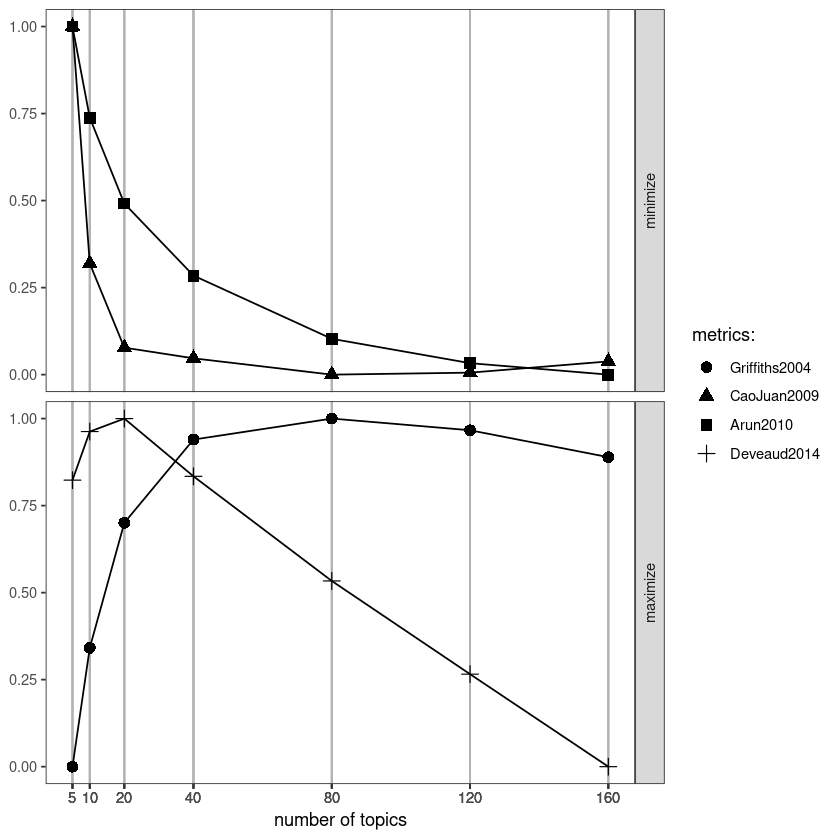

In [7]:
FindTopicsNumber_plot(results_1)

In [8]:
# results_2 <- FindTopicsNumber(word_counts, 
#                             topics = c(15, 18, 19, 20, 21, 22, 25), 
#                             metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                             method = "Gibbs", 
#                             control = list(seed = 544))
# saveRDS(results_2, file = assets("results_2.rds"))
results_2 <- readRDS(assets("results_2.rds"))

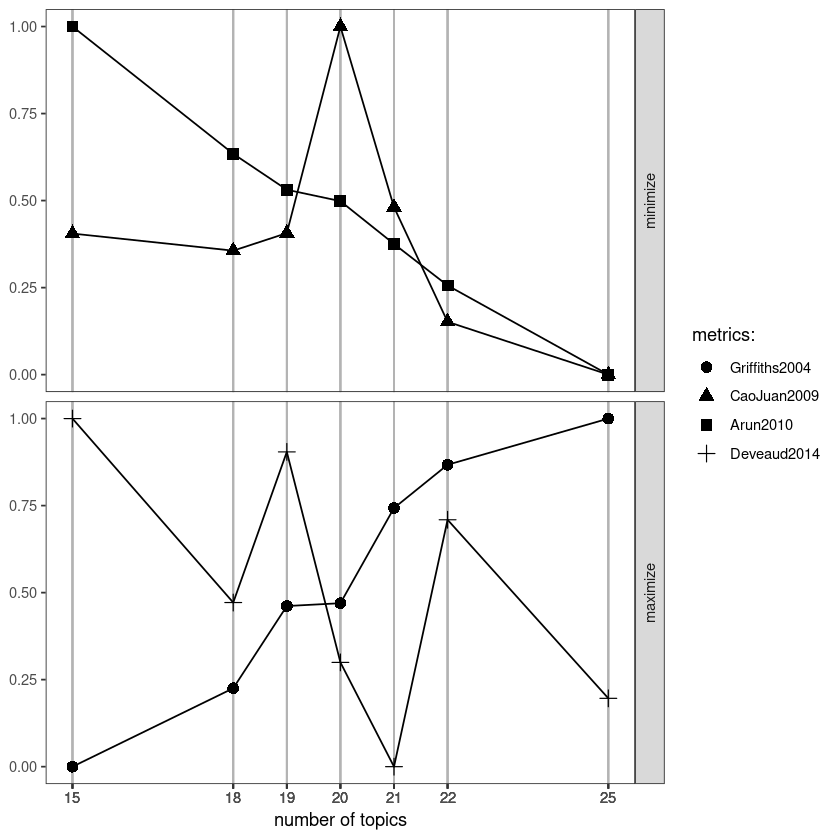

In [9]:
FindTopicsNumber_plot(results_2)

In [10]:
results_3 <- FindTopicsNumber(word_counts, 
                            topics = seq(15, 35), 
                            metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
                            method = "Gibbs", 
                            control = list(seed = 912))
saveRDS(results_3, file = assets("results_3.rds"))
results_3 <- readRDS(assets("results_3.rds"))

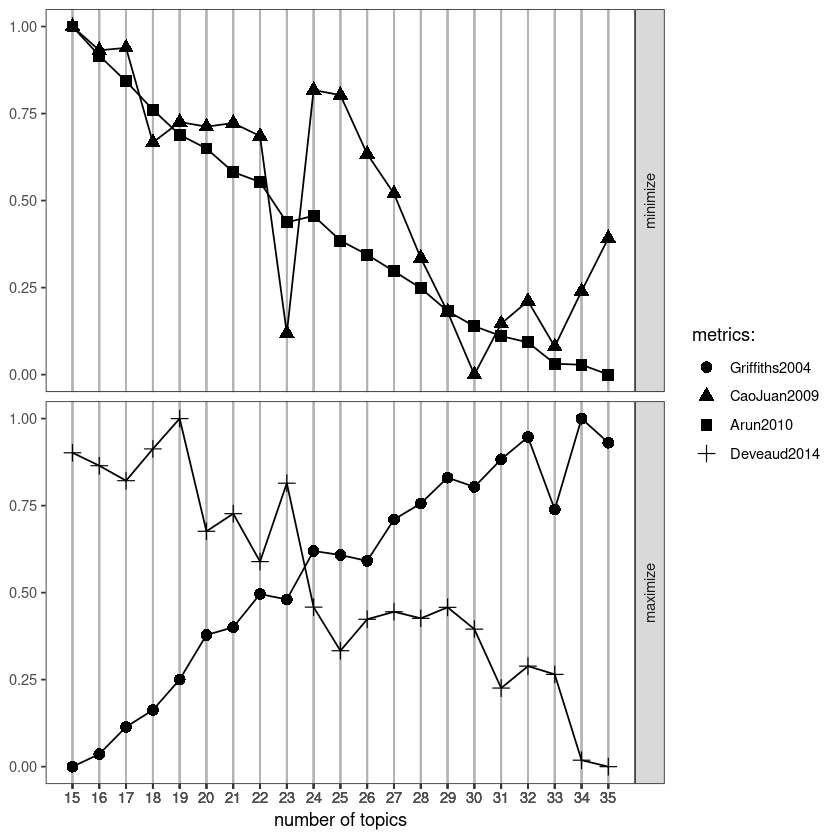

In [11]:
FindTopicsNumber_plot(results_3)

## Create model to be used
Models based on data as of Oct 12, 2020.

In [12]:
# narratives_lda <- LDA(word_counts, method = "Gibbs", k = 23, control = list(seed = 912))
# saveRDS(narratives_lda, assets("narratives_lda.rds"))
narratives_lda <- readRDS(assets("narratives_lda.rds"))
narratives_lda

A LDA_Gibbs topic model with 23 topics.

## Get betas and gammas 

In [13]:
gammas <- tidy(narratives_lda, matrix = "gamma")
head(gammas)

document,topic,gamma
<chr>,<int>,<dbl>
20140071,1,0.01809061
20130283,1,0.02092852
20160294,1,0.05881675
20110421,1,0.01386682
20140177,1,0.01668625
20040214,1,0.01959584


In [14]:
betas <- tidy(narratives_lda, matrix = "beta")
head(betas)

topic,term,beta
<int>,<chr>,<dbl>
1,line,7.913214e-05
2,line,7.982247e-06
3,line,4.370248e-03
4,line,8.421904e-06
5,line,6.856923e-06
6,line,3.538048e-01


## Save model

In [15]:
saveRDS(betas, data_folder("betas.rds"))

In [16]:
gammas <- narratives %>%
    mutate(incident_ID = as.character(incident_ID)) %>%
    select(incident_ID, ID, year, commodity, on_offshore) %>%
    right_join(gammas, by = c("incident_ID" = "document"))

head(gammas)

incident_ID,ID,year,commodity,on_offshore,topic,gamma
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
20040015,19237,2004,rpp,onshore,1,0.03150599
20040015,19237,2004,rpp,onshore,2,0.03150599
20040015,19237,2004,rpp,onshore,3,0.04599874
20040015,19237,2004,rpp,onshore,4,0.17643352
20040015,19237,2004,rpp,onshore,5,0.03150599
20040015,19237,2004,rpp,onshore,6,0.03150599


In [17]:
saveRDS(gammas, data_folder("gammas.rds"))